# Continuous Probabilistic Methods Exercises
---

### 1. Define a function named `get_lower_and_upper_bounds` that has two arguments. The first argument is a pandas Series. The second argument is the multiplier, which should have a default argument of 1.5.

In [1]:
# imports
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# define function to get upper and lower bounds
def get_lower_and_upper_bounds(series, multiplier=1.5):
    '''
    This function takes in a series and a multiplier (default=1.5). It returns
    lower and upper bounds using the IQR.
    '''
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3-q1
    lower = q1 - (multiplier*iqr)
    upper = q3 + (multiplier*iqr)
    return lower, upper

---
### 1. Using `lemonade.csv` dataset and focusing on continuous variables:

#### Use the IQR Range Rule and the upper and lower bounds to identify the lower outliers of each column of `lemonade.csv`, using the multiplier of 1.5. Do these lower outliers make sense? Which outliers should be kept?

In [3]:
# acquire data
lemonade = pd.read_csv('https://gist.githubusercontent.com/ryanorsinger/19bc7eccd6279661bd13307026628ace/raw/e4b5d6787015a4782f96cad6d1d62a8bdbac54c7/lemonade.csv')
lemonade.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18


In [4]:
# view dtypes
lemonade.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         365 non-null    object 
 1   Day          365 non-null    object 
 2   Temperature  365 non-null    float64
 3   Rainfall     365 non-null    float64
 4   Flyers       365 non-null    int64  
 5   Price        365 non-null    float64
 6   Sales        365 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 20.1+ KB


In [5]:
# get lower and upper bounds for each numerical column
lower_Temperature, upper_Temperature = get_lower_and_upper_bounds(lemonade.Temperature)
lower_Rainfall, upper_Rainfall = get_lower_and_upper_bounds(lemonade.Rainfall)
lower_Flyers, upper_Flyers = get_lower_and_upper_bounds(lemonade.Flyers)
lower_Price, upper_Price = get_lower_and_upper_bounds(lemonade.Price)
lower_Sales, upper_Sales = get_lower_and_upper_bounds(lemonade.Sales)

In [6]:
# view lower outliers
pd.concat([lemonade[lemonade[col] < eval('lower_' + str(col))] for col in lemonade.select_dtypes(include=['int64', 'float64'])])

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
364,12/31/17,Sunday,15.1,2.50,9,0.5,7
324,11/21/17,Tuesday,47.0,0.95,-38,0.5,20


In [7]:
# base function courtesy of Brent, thanks!
# function to get df of all outliers
def get_all_outliers(df, multiplier=1.5):
    '''
    This function takes in a dataframe and a multiplier (default=1.5) and returns
    a dataframe of both upper- and lower-bound outliers.
    '''
    outliers = pd.DataFrame()
    # Create a for loop that will iterate through the list of quantitative values calculating the IQR value
    # and setting the upper and lower limits. 
    for col in df.select_dtypes(include=['int64', 'float64']).columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        # Calculate value for IQR
        iqr = q3 - q1
        # Calculate the upper and lower limits for acceptable values(inclusive)
        inner_lower_limit = q1 - (multiplier * iqr)
        inner_upper_limit = q3 + (multiplier * iqr)
        outliers = outliers.append(df[df[col] < inner_lower_limit])
        outliers = outliers.append(df[df[col] > inner_upper_limit])
    return outliers
# test function
get_all_outliers(lemonade)

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
364,12/31/17,Sunday,15.1,2.50,9,0.5,7
41,2/11/17,Saturday,212.0,0.91,35,0.5,21
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
5,1/6/17,Friday,25.3,1.54,23,0.5,11
6,1/7/17,Saturday,32.9,1.54,19,0.5,13
10,1/11/17,Wednesday,32.6,1.54,23,0.5,12
11,1/12/17,Thursday,38.2,1.33,16,0.5,14
12,1/13/17,Friday,37.5,1.33,19,0.5,15


In [8]:
# modify function to get only upper/lower outliers
def get_outliers(df, multiplier=1.5, bound='both'):
    '''
    This function takes in a dataframe, a multiplier (default=1.5), and a boundary
    direction ('upper', 'lower', default='both') and returns a dataframe of outliers
    based on which bound was specified.
    '''
    outliers = pd.DataFrame()
    if bound == 'both':
        # Create a for loop that will iterate through the list of quantitative values calculating the IQR value
        # and setting the upper and lower limits. 
        for col in df.select_dtypes(include=['int64', 'float64']).columns:
            q1 = df[col].quantile(0.25)
            q3 = df[col].quantile(0.75)
            # Calculate value for IQR
            iqr = q3 - q1
            # Calculate the upper and lower limits for acceptable values(inclusive)
            inner_lower_limit = q1 - (multiplier * iqr)
            inner_upper_limit = q3 + (multiplier * iqr)
            outliers = outliers.append(df[df[col] < inner_lower_limit])
            outliers = outliers.append(df[df[col] > inner_upper_limit])
    elif bound == 'lower':
        for col in df.select_dtypes(include=['int64', 'float64']).columns:
            q1 = df[col].quantile(0.25)
            q3 = df[col].quantile(0.75)
            # Calculate value for IQR
            iqr = q3 - q1
            # Calculate the upper and lower limits for acceptable values(inclusive)
            inner_lower_limit = q1 - (multiplier * iqr)
            outliers = outliers.append(df[df[col] < inner_lower_limit])
    elif bound == 'upper':
        for col in df.select_dtypes(include=['int64', 'float64']).columns:
            q1 = df[col].quantile(0.25)
            q3 = df[col].quantile(0.75)
            # Calculate value for IQR
            iqr = q3 - q1
            # Calculate the upper and lower limits for acceptable values(inclusive)
            inner_upper_limit = q3 + (multiplier * iqr)
            outliers = outliers.append(df[df[col] > inner_upper_limit])
    return outliers
# test function
get_outliers(lemonade, bound='lower')

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
364,12/31/17,Sunday,15.1,2.50,9,0.5,7
324,11/21/17,Tuesday,47.0,0.95,-38,0.5,20


The outlier on 12/31/17 makes sense; all values seem to be within reasonable limits. However, the outlier on 11/21/17 has a negative value for `Flyers`, which doesn't make sense since you can't have a negative amount of physical objects. Therefore, it makes sense to me to keep the outlier on 12/31/17 and to either get rid of or fix the outlier on 11/21/17 by changing it to a positive number since that was probably a mistake in data entry.

#### Use the IQR Range Rule and the upper and upper bounds to identify the upper outliers of each column of `lemonade.csv`, using the multiplier of 1.5. Do these upper outliers make sense? Which outliers should be kept?

In [9]:
# view upper outliers
pd.concat([lemonade[lemonade[col] > eval('upper_' + str(col))] for col in lemonade.select_dtypes(include=['int64', 'float64'])])

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
41,2/11/17,Saturday,212.0,0.91,35,0.5,21
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
5,1/6/17,Friday,25.3,1.54,23,0.5,11
6,1/7/17,Saturday,32.9,1.54,19,0.5,13
10,1/11/17,Wednesday,32.6,1.54,23,0.5,12
11,1/12/17,Thursday,38.2,1.33,16,0.5,14
12,1/13/17,Friday,37.5,1.33,19,0.5,15
15,1/16/17,Monday,30.6,1.67,24,0.5,12


In [10]:
# use function to get upper outliers
get_outliers(lemonade, bound='upper')

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
41,2/11/17,Saturday,212.0,0.91,35,0.5,21
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
5,1/6/17,Friday,25.3,1.54,23,0.5,11
6,1/7/17,Saturday,32.9,1.54,19,0.5,13
10,1/11/17,Wednesday,32.6,1.54,23,0.5,12
11,1/12/17,Thursday,38.2,1.33,16,0.5,14
12,1/13/17,Friday,37.5,1.33,19,0.5,15
15,1/16/17,Monday,30.6,1.67,24,0.5,12


2/11/17 has a temperature of 212 which does not make sense because that would mean a catastrophic event occurred and I doubt updating the lemonade sales for the day would be on any survivors' to-do lists. Even if the csv was updated automatically it's unlikely this occurred since there are still lemonade sales after that date, suggesting human life did not come to an end, so I would definitely not use this value. Some options could include dropping the record entirely, using forward- or backfill, or using the mean temperature of the days surrounding that record.

Additionally, the last 4 outliers in the dataframe above are suspicious since no other dates have sales in the triple digits. It could be the case that the lemonade seller was invited to sell their lemonade at a Fourth of July event and had a lot more customers than usual. However, since this still isn't really representative of their normal lemonade sales I would likely drop these outliers if I were trying to make predictions about future sales.

As for the higher numbers in the `Flyers` and `Rainfall` columns, I don't think these numbers are unrealistic so I would be inclined to keep those as they are.

#### Using the multiplier of 3, IQR Range Rule, and the lower bounds, identify the outliers below the lower bound in each colum of `lemonade.csv`. Do these lower outliers make sense? Which outliers should be kept?

In [11]:
# get lower outlier with multiplier=3
get_outliers(lemonade, 3, 'lower')

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
324,11/21/17,Tuesday,47.0,0.95,-38,0.5,20


When using a multiplier of 3, the only lower-bound outlier is on 11/21/17 which was the day with a negative value for `Flyers`. This doesn't make sense so I wouldn't keep any of the lower-bound outliers with a multiplier of 3.

#### Using the multiplier of 3, IQR Range Rule, and the upper bounds, identify the outliers above the upper_bound in each colum of `lemonade.csv`. Do these upper outliers make sense? Which outliers should be kept?

In [12]:
# get upper outliers with multiplier=3
get_outliers(lemonade, 3, 'upper')

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
41,2/11/17,Saturday,212.0,0.91,35,0.5,21
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
338,12/5/17,Tuesday,22.0,1.82,11,0.5,10
343,12/10/17,Sunday,31.3,1.82,15,0.5,11
364,12/31/17,Sunday,15.1,2.50,9,0.5,7
181,7/1/17,Saturday,102.9,0.47,59,0.5,143
182,7/2/17,Sunday,93.4,0.51,68,0.5,158
183,7/3/17,Monday,81.5,0.54,68,0.5,235
184,7/4/17,Tuesday,84.2,0.59,49,0.5,534


My sentiments are the same as when the multiplier was 1.5; I would only drop the first and last 4 records in the dataframe above (2/11/17 and 7/1-4/2017).

### 2. Identify if any columns in `lemonade.csv` are normally distributed. For normally distributed columns:

#### Use a 2 sigma decision rule to isolate the outliers.
- Do these make sense?
- Should certain outliers be kept or removed?

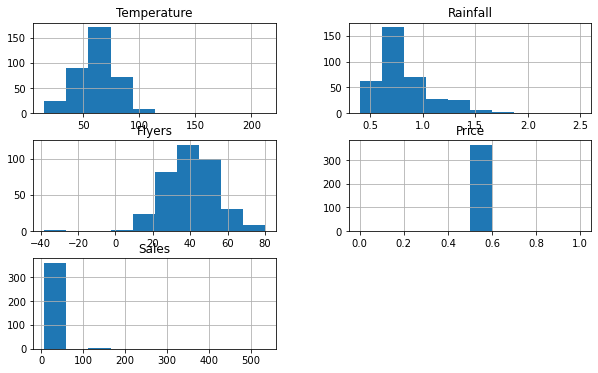

In [13]:
# view distributions
lemonade.hist(figsize=(10,6));

I see that Sales does not appear to be normally distributed, but I'm not sure if this is just because of the outliers. I want to look at it a little closer without those outliers.

<AxesSubplot:>

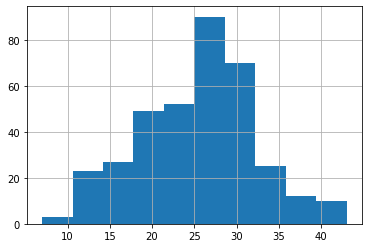

In [14]:
# view distribution without outliers
lemonade[lemonade.Sales < 140].Sales.hist()

Looks like Sales is also normally distributed, except for those pesky outliers. I'll go ahead and include it in my list of normally distributed columns.

In [15]:
# list normally distributed cols
norm = ['Temperature', 'Rainfall', 'Flyers', 'Sales']

In [16]:
# calculate z-scores, add to dataframe
z_scores=pd.DataFrame()
for col in lemonade[norm]:
    lemonade[str(col)+'_z'] = ((lemonade[col] - lemonade[col].mean()) / lemonade[col].std())
lemonade

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,Temperature_z,Rainfall_z,Flyers_z,Sales_z
0,1/1/17,Sunday,27.0,2.00,15,0.5,10,-1.892340,4.286488,-1.820927,-0.577281
1,1/2/17,Monday,28.9,1.33,15,0.5,13,-1.787286,1.840253,-1.820927,-0.480344
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15,-1.477652,1.840253,-0.950507,-0.415720
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17,-0.946852,0.817946,-0.877972,-0.351096
4,1/5/17,Thursday,42.4,1.00,33,0.5,18,-1.040848,0.635391,-0.515297,-0.318783
...,...,...,...,...,...,...,...,...,...,...,...
360,12/27/17,Wednesday,42.7,1.00,33,0.5,19,-1.024260,0.635391,-0.515297,-0.286471
361,12/28/17,Thursday,37.8,1.25,32,0.5,16,-1.295189,1.548165,-0.587832,-0.383408
362,12/29/17,Friday,39.5,1.25,17,0.5,15,-1.201194,1.548165,-1.675857,-0.415720
363,12/30/17,Saturday,30.9,1.43,22,0.5,13,-1.676702,2.205363,-1.313182,-0.480344


In [17]:
# outliers using 2 sigma rule
lemonade[(lemonade['Temperature_z'].abs() >= 2) | (lemonade['Rainfall_z'].abs() >= 2) | (lemonade['Flyers_z'].abs() >= 2) | (lemonade['Sales_z'].abs() >= 2)]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,Temperature_z,Rainfall_z,Flyers_z,Sales_z
0,1/1/17,Sunday,27.0,2.00,15,0.5,10,-1.892340,4.286488,-1.820927,-0.577281
5,1/6/17,Friday,25.3,1.54,23,0.5,11,-1.986336,2.606983,-1.240647,-0.544968
6,1/7/17,Saturday,32.9,1.54,19,0.5,13,-1.566119,2.606983,-1.530787,-0.480344
10,1/11/17,Wednesday,32.6,1.54,23,0.5,12,-1.582706,2.606983,-1.240647,-0.512656
15,1/16/17,Monday,30.6,1.67,24,0.5,12,-1.693290,3.081626,-1.168112,-0.512656
16,1/17/17,Tuesday,32.2,1.43,26,0.5,14,-1.604823,2.205363,-1.023042,-0.448032
19,1/20/17,Friday,31.6,1.43,20,0.5,12,-1.637998,2.205363,-1.458252,-0.512656
23,1/24/17,Tuesday,28.6,1.54,20,0.5,12,-1.803873,2.606983,-1.458252,-0.512656
41,2/11/17,Saturday,212.0,0.91,35,0.5,21,8.336627,0.306792,-0.370227,-0.221847
166,6/16/17,Friday,99.3,0.47,77,0.5,41,2.105251,-1.299691,2.676244,0.424395


In [18]:
# do the same thing differently
pd.concat([lemonade[lemonade[str(col)+'_z'].abs() >= 2] for col in norm]).drop_duplicates()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,Temperature_z,Rainfall_z,Flyers_z,Sales_z
41,2/11/17,Saturday,212.0,0.91,35,0.5,21,8.336627,0.306792,-0.370227,-0.221847
166,6/16/17,Friday,99.3,0.47,77,0.5,41,2.105251,-1.299691,2.676244,0.424395
176,6/26/17,Monday,102.6,0.47,60,0.5,42,2.287714,-1.299691,1.443149,0.456708
181,7/1/17,Saturday,102.9,0.47,59,0.5,143,2.304301,-1.299691,1.370614,3.720233
190,7/10/17,Monday,98.0,0.49,66,0.5,40,2.033372,-1.226669,1.878359,0.392083
198,7/18/17,Tuesday,99.3,0.47,76,0.5,41,2.105251,-1.299691,2.603709,0.424395
202,7/22/17,Saturday,99.6,0.47,49,0.5,42,2.121838,-1.299691,0.645264,0.456708
207,7/27/17,Thursday,97.9,0.47,74,0.5,43,2.027843,-1.299691,2.458639,0.489020
338,12/5/17,Tuesday,22.0,1.82,11,0.5,10,-2.168799,3.629291,-2.111067,-0.577281
364,12/31/17,Sunday,15.1,2.50,9,0.5,7,-2.550311,6.112037,-2.256137,-0.674217


Most of the records identified as outliers seem plausible to me. The only outliers I might want to drop are the same as before: those records where Temperature==212, Flyers==-38, Sales.isin(143, 158, 235, 534).

### 3. Now use a 3 sigma decision rule to isolate the outliers in the normally distributed columns from `lemonade.csv`

In [19]:
# find outliers using 3 sigma rule
lemonade[(lemonade['Temperature_z'].abs() >= 3) | (lemonade['Rainfall_z'].abs() >= 3) | (lemonade['Flyers_z'].abs() >= 3) | (lemonade['Sales_z'].abs() >= 3)]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,Temperature_z,Rainfall_z,Flyers_z,Sales_z
0,1/1/17,Sunday,27.0,2.00,15,0.5,10,-1.892340,4.286488,-1.820927,-0.577281
15,1/16/17,Monday,30.6,1.67,24,0.5,12,-1.693290,3.081626,-1.168112,-0.512656
41,2/11/17,Saturday,212.0,0.91,35,0.5,21,8.336627,0.306792,-0.370227,-0.221847
181,7/1/17,Saturday,102.9,0.47,59,0.5,143,2.304301,-1.299691,1.370614,3.720233
182,7/2/17,Sunday,93.4,0.51,68,0.5,158,1.779030,-1.153647,2.023429,4.204914
183,7/3/17,Monday,81.5,0.54,68,0.5,235,1.121058,-1.044114,2.023429,6.692948
184,7/4/17,Tuesday,84.2,0.59,49,0.5,534,1.270346,-0.861559,0.645264,16.354275
324,11/21/17,Tuesday,47.0,0.95,-38,0.5,20,-0.786506,0.452836,-5.665283,-0.254159
338,12/5/17,Tuesday,22.0,1.82,11,0.5,10,-2.168799,3.629291,-2.111067,-0.577281
343,12/10/17,Sunday,31.3,1.82,15,0.5,11,-1.654586,3.629291,-1.820927,-0.544968
